<a href="https://colab.research.google.com/github/Aranzasuu/ADA-Informes/blob/main/QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. PROBLEMA DE ORDENAMIENTO**

Uno de los problemas fundamentales en la ciencia de la computación es ordenar una lista de elementos. Existe una infinidad de métodos de ordenamiento, algunos son simples e intuitivos y otros como son extremadamente complicados, pero producen resultados mucho más rápido.

## DATOS:
**${↪}$ 𝙴𝚗𝚝𝚛𝚊𝚍𝚊:** Secuencia de n elementos. $[a_1,a_2,a_3,...,a_n]$, es decir que va desde el 1 hasta total de elementos (n), estos pertenecen al conjunto de los reales.

**${↪}$ 𝚂𝚊𝚕𝚒𝚍𝚊:** Permutación ordenada de la secuencia de entrada $[a_1',a_2',a_3',...,a_n']$ tal que $a_1 ≤ a_2 ≤ a_3 ≤ ... ≤ a_n$.


![image](https://i.imgur.com/aAwSof4.png)


# **2. ALGORITMO QUICKSORT**

**${↪}$ 𝙴𝚗𝚝𝚛𝚊𝚍𝚊:** Una lista o arreglo con un total de n elementos (n ∈ ℝ).

**${↪}$ 𝚂𝚊𝚕𝚒𝚍𝚊:** El mismo arreglo pero con los elementos ordenados.

Este algoritmo se utiliza para resolver problemas de ordenamiento, el objetivo es escoger un elemento como pivote y dividir la matriz dada alrededor del pivote elegido. Para seleccionar el pivote hay diferentes maneras:

- Elegir el primer elemento como pivote
- Elegir siempre el último elemento como pivote
- Elegir un elemento aleatorio como pivote
- Elegir la mediana como pivote

Para poder implementar esta solución, utilizaremos el método "Divide y vencerás":

1. 𝙳𝚒𝚟𝚒𝚍ir ${→}$ Debemos dividir el arreglo en 2 con la función Partition, escogiendo el elemento pivote.

2. 𝙾𝚛𝚍𝚎𝚗𝚊𝚛 ${→}$ De forma recursiva, llamamos a la función quicksort para ordenar el subarreglo izquierdo al pivote y el subarreglo derecho.

# 2.1 Código

In [239]:
# Importación de las librerías
import matplotlib.pyplot as plt
import math
import datetime
from timeit import repeat
import numpy as np
import random
from termcolor import colored

## **2.1 Explicación Función $Partition$**

El objetivo de esta función es la de ordenar los subarreglos divididos según el pivote elegido. Cabe destacar que el subarreglo izquierdo corresponde a los datos menores o iguales al pivote y el subarreglo derecho contiene a los datos mayores al pivote. Una vez que termina de comparar, el pivote es posicionado entre los dos subarreglos. Esta función retorna el índice de la posición del pivote. Por lo que veremos distintos casos:

## **2.2 Explicación Función quick_sort**

Nuestro caso base corresponde cuando el índice inicial es el mismo al índice final del subarreglo, es decir que contiene sólo un elemento. Luego definimos una variable asignandole el resultado de la función $partition$ y llamamos recursivamente la función $quicksort$ para ir diviendo el arreglo en torno al pivote seleccionado, es decir el subarreglo izquierdo comienza del primer elemento hasta el pivote y el subarreglo derecho desde el pivote hasta el final del arreglo.

In [240]:
comp = 0

### **${▹}$ Primer elemento como pivote**

In [295]:
def partitionLow(array, inicial, final, verbose):
    low = inicial
    high = final
    global comp

    if verbose:
      print("\n****** Función Partition ******\n")
      print("Arreglo a dividir >>", array)
      print("pivote >>", array[low])

    for i in range(inicial,high):
      comp += 1
      if array[i] <= array[high]:
        array[i],array[low] = array[low],array[i]
        low += 1

    array[low], array[high] = array[high], array[low]
    if verbose:
      print("Arreglo después del partition >>", array,"\n")

    return low

def QuickSortLow(array, low, high, verbose):
  if low >= high:
    return
  
  p = partitionLow(array, low, high,verbose)
  if verbose:
    print("------ Funcion QuickSortLow ------")
    print("SubArreglo izq >>", array[:p-1])
    print("SubArreglo der >>", array[p+1:],"\n")
  QuickSortLow(array,low, p-1,verbose)
  QuickSortLow(array,p+1,high,verbose)

In [296]:
array = random.sample(range(1,100),5)
print(colored(f"Entrada >> {str(array[:])}","blue"))

QuickSortLow(array, 0, len(array) - 1, verbose = False)

print(colored(f"Salida >> {str(array[:])}","red"))
#print("contador de comparaciones:",comp)
comp = 0

Entrada >> [20, 38, 75, 98, 93]
Salida >> [20, 38, 75, 93, 98]


### **${▹}$ Último elemento como pivote**

In [319]:
def partitionHigh(array, inicial, final, verbose):
  i = inicial
  global comp

  for j in range(inicial, final):
    comp += 1
    if array[j] <= array[final]:
      i += 1
      (array[i], array[j]) = (array[j], array[i])
  
  (array[i], array[final]) = (array[final], array[i])
  return i

def QuickSortHigh(array, low, high, verbose):
  if low < high:
    return
  
  p = partitionHigh(array, low, high,verbose)
  if verbose:
    print("------ Funcion QuickSortLow ------")
    print("SubArreglo izq >>", array[:p-1])
    print("SubArreglo der >>", array[p+1:],"\n")
  QuickSortHigh(array,low, p-1,verbose)
  QuickSortHigh(array,p+1,high,verbose)

In [320]:
array2 = random.sample(range(1,100),5)
print(colored(f"Entrada >> {str(array[:])}","blue"))

QuickSortHigh(array2, 0, len(array2) - 1, verbose = False)

print(colored(f"Salida >> {str(array2[:])}","red"))
comp = 0

Entrada >> [20, 33, 41, 77, 98]
Salida >> [89, 72, 48, 53, 24]


## **2.3 Ejemplo**

Para entender mejor veamos un pequeño ejemplo:

${Entrada →}$ $[5,2,1,8,3,9,7]$

1. Escogeremos como pivote el primer elemento de la lista $(P = 5)$

${izquierda_1}$ (elementos menores que 5)

> ![image](https://i.imgur.com/GuZaZGI.jpg)

${derecha_1}$ (elementos mayores o iguales a 5)

> ![image](https://i.imgur.com/SSI5D0C.jpg)


2. El algoritmo se aplica a la sublista izquierda:

> ![image](https://i.imgur.com/gnXjBYb.jpg)

3. El algoritmo se aplica a la sublista derecha:

> ![image](https://i.imgur.com/9Z0a3BM.jpg)

4. Lista ordenada final:

> ![image](https://i.imgur.com/GngIZkt.jpg)






## **2.4 Algoritmo Paso a Paso**

Ahora con la opción ${verbose}$ podremos ver y entender de mejor manera el proceso de los casos planteados anteriormente.

### **${▹}$ Primer elemento como pivote**

In [303]:
array = random.sample(range(1,100),5)
print(colored(f"Entrada >> {array}","blue"))

QuickSortLow(array, 0, len(array) - 1, verbose = True)

print(colored(f"Salida >> {array}","red"))
print("contador de comparaciones:",comp)
comp = 0

Entrada >> [20, 77, 41, 98, 33]

****** Función Partition ******

Arreglo a dividir >> [20, 77, 41, 98, 33]
pivote >> 20
Arreglo después del partition >> [20, 33, 41, 98, 77] 

------ Funcion QuickSortLow ------
SubArreglo izq >> []
SubArreglo der >> [41, 98, 77] 


****** Función Partition ******

Arreglo a dividir >> [20, 33, 41, 98, 77]
pivote >> 41
Arreglo después del partition >> [20, 33, 41, 77, 98] 

------ Funcion QuickSortLow ------
SubArreglo izq >> [20, 33]
SubArreglo der >> [98] 

Salida >> [20, 33, 41, 77, 98]
contador de comparaciones: 6


In [316]:
array2 = random.sample(range(1,100),5)
print(colored(f"Entrada >> {array2}","blue"))

QuickSortHigh(array2, 0, len(array2) - 1, verbose = True)

print(colored(f"Salida >> {array2}","red"))
print("contador de comparaciones:", comp)
comp = 0

Entrada >> [98, 44, 19, 62, 91]
Salida >> [98, 44, 19, 62, 91]
contador de comparaciones: 0


# **3. CORRECTITUD**

La correctitud de *Quicksort* se reduce a la correctitud de *Partition*: si *Partition* es correcto, *Quicksort* es también correcto.

## **3.1 Teorema 1 (Correctitud función $partition$)**

La función tiene como entrada un arreglo en el que la parte izquierda referente al pivote serán lo elementos menores a este, mientras que en la parte derecha serán los elementos mayores.

Para realizar la prueba de correctitud utilizaremos la propiedad del bucle invariante.

Para establacer la correctitud, usaremos los siguientes invariantes para el inicio de cada iteración:

1. si $p ≤ k ≤ i$, entonces $A[k] ≤ x$
2. si $i < k < j$, entonces $A[k] > x$
3. si k = r, entonces $A[k] = x$

![image](https://i.imgur.com/POq8uJY.jpg)

>
> **Inicialización:** Al comienzo de la primera iteración, $i = p - 1$ y $j = p$. Como no existe $k$ tal que $p ≤ k ≤ i$ o $i < k < j$, los invariantes 1 y 2 son ciertos. El invariante 3 ya que dentro del ciclo se revisa si es mayor/menor o igual, en este caso a x.
>
> **Mantención:** Consideraremos 2 casos para una iteración dada:
>
> a. $A[j] > x$
>
> La iteración no cambia el arreglo y $j$ se incrementa. Al inicio de la nueva iteración tenemos un nuevo $k = j$ para el cual verificar el invariante 2, el cual es cierto porque $A[j] > x$
>
> ![image](https://i.imgur.com/ML9ZvMI.jpg)
>
> b. $A[j] ≤ x$
>
> $A[i + 1]$ se intercambia con $A[j]$ e $i$ se incrementa. No es difícil ver que el invariante se cumple al inicio de la próxima iteración.
>
>![image](https://i.imgur.com/iUG8vQ9.jpg)


## **3.2 Teorema 2 (Correctitud $QuickSort$)**

Para probar este segundo teorema utilizaremos la inducción matemática, donde para demostrar una declaración $P(n)$, debemos probar lo siguiente:

1. Probar $P(n)$ para un caso base, por ejemplo $P(1)$.
2. Probar que si $P(m)$ es cierto, siendo que $m < n$, entonces $P(n)$ si lo es.

> **Caso base** ${⇒}$ La función al recibir un arreglo de tamaño 1 (es decir que solo contiene un elemento) automaticamente se asume que está ordenado, por lo que nuestro punto 1 es correcto.
>
> **Caso General** ${⇒}$ Considerando que nuestra función lo máximo que recibirá será un arreglo de tamaño n, recursivamente irá dividiendo el arreglo en subarreglos, en el mejor caso nuestra $m = {\frac n2}$ hasta llegar a nuestro caso base, por lo que nuestro segundo punto también es correcto.

# **4. TIEMPO DE EJECUCIÓN**

#**4.1. Teorema (Tiempo de ejecución)**

$División$: Dividir la lista en partes menores y mayores que el pivote toma un tiempo de $O(n)$ porque el algoritmo necesita revisar el arreglo, que tiene elementos $O(n)$. Para cada elemento, el algoritmo realiza un número constante de comparaciones.

$Subproblemas$:

En el peor caso, todos los elementos son menores o mayores que el pivote. En otras palabras, si el pivote es el elemento más pequeño o más grande del arreglo, se necesita tiempo de $T(n-1)$ para resolver los subproblemas porque habrá $(n-1)$ llamadas recursivas al algoritmo que crea subarreglos de tamaño $0$ y $(n-1)$ y luego en el siguiente paso creará subarreglos de tamaño $0$ y $(n-2)$, y así sucesivamente, entonces el peor caso de recurrencia sería:

$$T(n) = T\left({n-1}\right) + O(n)$$ 

Basado en el teorema maestro podemos encontrar la solución a esta recurrencia con:

$$T(n) = O(n^2)$$

> ![image](https://cdn.kastatic.org/ka-perseus-images/7da2ac32779bef669a6f05decb62f219a9132158.png)

El mejor caso sera cuando $Partition$ produce dos subproblemas, cada uno de tamaño no más de $(n/2)$, ya que uno es de tamaño $(n/2)$ y uno de tamaño $(n/2)-1$, esto significa que en cada paso, el tamaño del problema se está reduciendo a la mitad. En este caso, Quicksort corre mucho más rápido. La recurrencia para el tiempo de ejecución sería:

$$T(n) = 2T\left(\frac{n}{2}\right) + O(n)$$ 

Basado en el teorema maestro podemos encontrar la solución a esta recurrencia con:

$$T(n) = O(nlogn)$$

> ![image](https://cdn.kastatic.org/ka-perseus-images/21cd0d70813845d67fbb11496458214f90ad7cb8.png)

El caso promedio, se necesita considerar toda la permutación posible del arreglo y calcular el tiempo que toma cada permutación. También podemos tener una idea del caso promedio considerando el caso cuando la $Partition$ pone elementos $O(n/9)$ en un conjunto y elementos $O(9n/10)$ en otro conjunto. La recurrencia para el tiempo de ejecución sería:

$$T(n) = T\left(\frac{9n}{10}\right) + T\left(\frac{n}{10}\right) + O(n)$$ 

Basado en el arbol de recurrencia podemos encontrar la solución a esta recurrencia arrojando:

$$T(n) = O(nlogn)$$

> ![image](https://cdn.kastatic.org/ka-perseus-images/130b2d2a1fe897253def054f4c3aa7bd94cb6cf2.png)

# **5. EXPERIMENTOS**

In [317]:
def mergeSort(nlist):
    if len(nlist)>1:
        mid = len(nlist)//2
        lefthalf = nlist[:mid]
        righthalf = nlist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)
        i=j=k=0       
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                nlist[k]=lefthalf[i]
                i=i+1
            else:
                nlist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            nlist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            nlist[k]=righthalf[j]
            j=j+1
            k=k+1

nlist = [9,-3,5,2,6,8,-6,1,3,11]
print("Lista Inicial",nlist)
mergeSort(nlist)
print("Lista Ordenada",nlist)

Lista Inicial [9, -3, 5, 2, 6, 8, -6, 1, 3, 11]
Lista Ordenada [-6, -3, 1, 2, 3, 5, 6, 8, 9, 11]


In [318]:
def heapify(arr, n, i): 
    largest = i  
    l = 2 * i + 1     
    r = 2 * i + 2    
  
   
    if l < n and arr[i] < arr[l]: 
        largest = l 
  

    if r < n and arr[largest] < arr[r]: 
        largest = r 
  
    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i]  
  
        heapify(arr, n, largest) 
  
def heapSort(arr): 
    n = len(arr) 

    for i in range(n, -1, -1): 
        heapify(arr, n, i) 

    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] 
        heapify(arr, i, 0) 
  
arr = [9,-3,5,2,6,8,-6,1,3,11]
print("Lista Inicial",arr)
heapSort(arr) 
print("Lista Ordenada",arr)

Lista Inicial [9, -3, 5, 2, 6, 8, -6, 1, 3, 11]
Lista Ordenada [-6, -3, 1, 2, 3, 5, 6, 8, 9, 11]


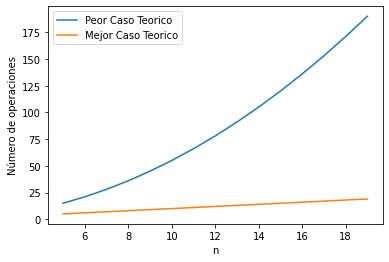

In [323]:
import random
import datetime
from math import log
import matplotlib.pyplot as plt
from timeit import repeat
%matplotlib inline

x=[n for n in range(5,20)] 
y1=[(n*(n+1))/2 for n in range(5,20)] 
y2=[2*(n/2) for n in range(5,20)] 
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  QuickSortLow(a,0,len(a)-1,verbose=False)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Peor Caso Teorico", "Mejor Caso Teorico", "QuickSort, Caso 3"])

plt.xlabel("n")
plt.ylabel("Número de operaciones")
plt.show()

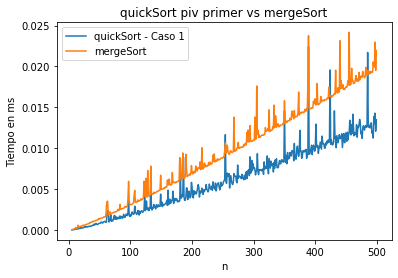

In [328]:
x=[]; y=[];z=[];e=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  l = repeat(setup="from __main__ import QuickSortLow", stmt=f"QuickSortLow({a},{0},{len(a)-1},{False})", repeat=1, number=10)
  t = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(l)
  z.append(t)

plt.plot(x,y)
plt.plot(x,z)

plt.title('quickSort piv primer vs mergeSort')
plt.legend(["quickSort - Caso 1","mergeSort"])
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

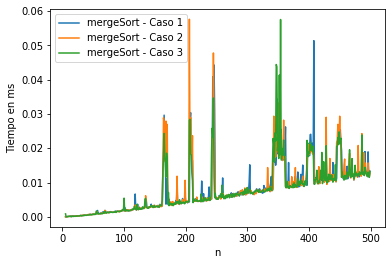

In [330]:
x=[]; y=[];z=[];e=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  l = repeat(setup="from __main__ import QuickSortLow", stmt=f"QuickSortLow({a},{0},{len(a)-1},{False})", repeat=1, number=10)
  t = repeat(setup="from __main__ import QuickSortLow", stmt=f"QuickSortLow({a},{2},{len(a)-1},{False})", repeat=1, number=10)
  v = repeat(setup="from __main__ import QuickSortLow", stmt=f"QuickSortLow({a},{3},{len(a)-1},{False})", repeat=1, number=10)

  x.append(n)
  y.append(l)
  z.append(t)
  e.append(v)


plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,e)
plt.legend(["mergeSort - quicksort piv primero"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

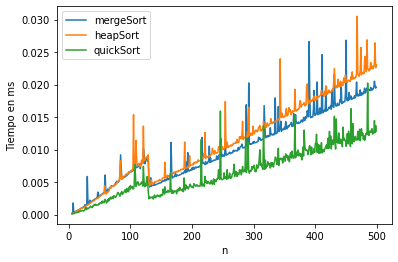

In [333]:
x=[]; y=[];z=[];e=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  l = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a})", repeat=1, number=10)
  t = repeat(setup="from __main__ import heapSort", stmt=f"heapSort({a})", repeat=1, number=10)
  v = repeat(setup="from __main__ import QuickSortLow", stmt=f"QuickSortLow({a},{0},{len(a)-1},{False})", repeat=1, number=10)

  x.append(n)
  y.append(l)
  z.append(t)
  e.append(v)

plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,e)
plt.legend(["mergeSort","heapSort","quickSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()